# Maximal extension of the extremal Kerr black hole

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

The computations make use of tools developed through the [SageManifolds project](https://sagemanifolds.obspm.fr).

In [1]:
version()

'SageMath version 9.3.rc5, Release Date: 2021-04-30'

First we set up the notebook to display mathematical objects using LaTeX rendering:

In [2]:
%display latex

To speed up computations, we ask for running them in parallel on 8 threads:

In [3]:
Parallelism().set(nproc=8)

## Spacetime manifold

We declare the Kerr spacetime as a 4-dimensional Lorentzian manifold $M$:

In [4]:
M = Manifold(4, 'M', structure='Lorentzian')
print(M)

4-dimensional Lorentzian manifold M


We then introduce (3+1 version of) the **Kerr coordinates** $(\tilde{t},r,\theta,\tilde{\varphi})$ as a chart `KC` on $M$, via the method `chart()`. The argument of the latter is a string (delimited by `r"..."` because of the backslash symbols) expressing the coordinates names, their ranges (the default is $(-\infty,+\infty)$) and their LaTeX symbols:

In [5]:
KC.<tt,r,th,tph> = M.chart(r"tt:\tilde{t} r th:(0,pi):\theta tph:(0,2*pi):periodic:\tilde{\varphi}") 
print(KC); KC

Chart (M, (tt, r, th, tph))


Chart (M, (tt, r, th, tph))

In [6]:
KC.coord_range()

tt: (-oo, +oo); r: (-oo, +oo); th: (0, pi); tph: [0, 2*pi] (periodic)

## Metric tensor 

The mass parameter $m$ of the extremal Kerr spacetime is declared as a symbolic variable:

In [7]:
m = var('m', domain='real')
assume(m>0)

We get the (yet undefined) spacetime metric:

In [8]:
g = M.metric()

and initialize it by providing its components in the coordinate frame associated with the Kerr coordinates, which is the current manifold's default frame:

In [9]:
rho2 = r^2 + (m*cos(th))^2
g[0,0] = - (1 - 2*m*r/rho2)
g[0,1] = 2*m*r/rho2
g[0,3] = -2*m^2*r*sin(th)^2/rho2
g[1,1] = 1 + 2*m*r/rho2
g[1,3] = -m*(1 + 2*m*r/rho2)*sin(th)^2
g[2,2] = rho2
g[3,3] = (r^2 + m^2 + 2*m^3*r*sin(th)^2/rho2)*sin(th)^2
g.display()

g = (2*m*r/(m^2*cos(th)^2 + r^2) - 1) dtt*dtt + 2*m*r/(m^2*cos(th)^2 + r^2) dtt*dr - 2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) dtt*dtph + 2*m*r/(m^2*cos(th)^2 + r^2) dr*dtt + (2*m*r/(m^2*cos(th)^2 + r^2) + 1) dr*dr - m*(2*m*r/(m^2*cos(th)^2 + r^2) + 1)*sin(th)^2 dr*dtph + (m^2*cos(th)^2 + r^2) dth*dth - 2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) dtph*dtt - m*(2*m*r/(m^2*cos(th)^2 + r^2) + 1)*sin(th)^2 dtph*dr + (2*m^3*r*sin(th)^2/(m^2*cos(th)^2 + r^2) + m^2 + r^2)*sin(th)^2 dtph*dtph

A matrix view of the components with respect to the manifold's default vector frame:

In [10]:
g[:]

[                                2*m*r/(m^2*cos(th)^2 + r^2) - 1                                     2*m*r/(m^2*cos(th)^2 + r^2)                                                               0                        -2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2)]
[                                    2*m*r/(m^2*cos(th)^2 + r^2)                                 2*m*r/(m^2*cos(th)^2 + r^2) + 1                                                               0                  -m*(2*m*r/(m^2*cos(th)^2 + r^2) + 1)*sin(th)^2]
[                                                              0                                                               0                                             m^2*cos(th)^2 + r^2                                                               0]
[                       -2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2)                  -m*(2*m*r/(m^2*cos(th)^2 + r^2) + 1)*sin(th)^2                                                               0 (2*m^3*r*sin(th)^2/(m^2*cos(th)^2 + r^2) + m^2 + r^2)*sin(th)^2]

The list of the non-vanishing components:

In [11]:
g.display_comp()

g_tt,tt = 2*m*r/(m^2*cos(th)^2 + r^2) - 1 
g_tt,r = 2*m*r/(m^2*cos(th)^2 + r^2) 
g_tt,tph = -2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) 
g_r,tt = 2*m*r/(m^2*cos(th)^2 + r^2) 
g_r,r = 2*m*r/(m^2*cos(th)^2 + r^2) + 1 
g_r,tph = -m*(2*m*r/(m^2*cos(th)^2 + r^2) + 1)*sin(th)^2 
g_th,th = m^2*cos(th)^2 + r^2 
g_tph,tt = -2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) 
g_tph,r = -m*(2*m*r/(m^2*cos(th)^2 + r^2) + 1)*sin(th)^2 
g_tph,tph = (2*m^3*r*sin(th)^2/(m^2*cos(th)^2 + r^2) + m^2 + r^2)*sin(th)^2

Let us check that we are dealing with a solution of the **vacuum Einstein equation**:

In [12]:
#g.ricci().display()

## Regions $M_{\rm I}$ and $M_{\rm III}$

In [13]:
M_I = M.open_subset('M_I', latex_name=r'M_{\rm I}', coord_def={KC: r>m})
KC.restrict(M_I).coord_range()

tt: (-oo, +oo); r: (m, +oo); th: (0, pi); tph: [0, 2*pi] (periodic)

In [14]:
M_III = M.open_subset('M_III', latex_name=r'M_{\rm III}', coord_def={KC: r<m})
KC.restrict(M_III).coord_range()

tt: (-oo, +oo); r: (-oo, m); th: (0, pi); tph: [0, 2*pi] (periodic)

## Boyer-Lindquist coordinates on $M_{\rm I}$

Let us introduce on the chart of Boyer-Lindquist coordinates $(t,r,\theta,\varphi)$ on $M_{\rm I}$:

In [15]:
BL.<t,r,th,ph> = M_I.chart(r"t r:(m,+oo) th:(0,pi):\theta ph:(0,2*pi):periodic:\varphi") 
print(BL); BL

Chart (M_I, (t, r, th, ph))


Chart (M_I, (t, r, th, ph))

In [16]:
BL.coord_range()

t: (-oo, +oo); r: (m, +oo); th: (0, pi); ph: [0, 2*pi] (periodic)

In [17]:
KC_to_BL = KC.restrict(M_I).transition_map(BL, [tt + 2*m^2/(r-m) - 2*m*ln(abs(r-m)/m),
                                                r, th, tph + m/(r-m)])
KC_to_BL.display()

t = -2*m*log(abs(-m + r)/m) - 2*m^2/(m - r) + tt
r = r
th = th
ph = tph - m/(m - r)

In [18]:
KC_to_BL.inverse().display()

tt = -(2*m^2*log(m) - 2*m*r*log(m) - 2*m^2 - (m - r)*t - 2*(m^2 - m*r)*log(-m + r))/(m - r)
r = r
th = th
tph = (m*ph - ph*r + m)/(m - r)

In [19]:
g.display(BL)

g = -(m^2*cos(th)^2 - 2*m*r + r^2)/(m^2*cos(th)^2 + r^2) dt*dt - 2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) dt*dph + (m^2*cos(th)^2 + r^2)/(m^2 - 2*m*r + r^2) dr*dr + (m^2*cos(th)^2 + r^2) dth*dth - 2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) dph*dt + (2*m^3*r*sin(th)^4 + (m^2*r^2 + r^4 + (m^4 + m^2*r^2)*cos(th)^2)*sin(th)^2)/(m^2*cos(th)^2 + r^2) dph*dph

## Ingoing principal null geodesics

In [20]:
k = M.vector_field(1, -1, 0, 0, name='k')
k.display()

k = d/dtt - d/dr

Let us check that $k$ is a null vector:

In [21]:
g(k, k).expr()

0

Check that $k$ is a geodesic vector field, i.e. obeys $\nabla_k k = 0$:

In [22]:
nabla = g.connection()

In [23]:
nabla(k).contract(k).display()

0

Expression of $k$ with respect to the Boyer-Lindquist frame:

In [24]:
k.display(BL)

k = (m^2 + r^2)/(m^2 - 2*m*r + r^2) d/dt - d/dr + m/(m^2 - 2*m*r + r^2) d/dph

## Outgoing principal null geodesics

In [25]:
el = M.vector_field((r + m)^2/(2*(r^2 + m^2)),
                    (r - m)^2/(2*(r^2 + m^2)),
                    0,
                    m/(r^2 + m^2),
                    name='el', latex_name=r'\ell')
el.display()

el = 1/2*(m + r)^2/(m^2 + r^2) d/dtt + 1/2*(m - r)^2/(m^2 + r^2) d/dr + m/(m^2 + r^2) d/dtph

Let us check that $\ell$ is a null vector:

In [26]:
g(el, el).expr()

0

Expression of $\ell$ with respect to the Boyer-Lindquist frame:

In [27]:
el.display(BL)

el = 1/2 d/dt + 1/2*(m - r)^2/(m^2 + r^2) d/dr + 1/2*m/(m^2 + r^2) d/dph

Computation of $\nabla_\ell \ell$:

In [28]:
acc = nabla(el).contract(el)
acc.display()

-1/2*(m^5 + 2*m^4*r - 2*m^2*r^3 - m*r^4)/(m^6 + 3*m^4*r^2 + 3*m^2*r^4 + r^6) d/dtt - 1/2*(m^5 - 2*m^4*r + 2*m^2*r^3 - m*r^4)/(m^6 + 3*m^4*r^2 + 3*m^2*r^4 + r^6) d/dr - (m^4 - m^2*r^2)/(m^6 + 3*m^4*r^2 + 3*m^2*r^4 + r^6) d/dtph

We check that $\nabla_\ell \ell = \kappa \ell$:

In [29]:
kappa = acc[0] / el[0]
kappa

-(m^3 - m*r^2)/(m^4 + 2*m^2*r^2 + r^4)

In [30]:
kappa.factor()

-(m + r)*(m - r)*m/(m^2 + r^2)^2

In [31]:
acc == kappa*el

True

## Outgoing Kerr coordinates on $M_{\rm I}$

In [32]:
OKC.<to,r,th,oph> = M_I.chart(r"to:\tilde{\tilde{t}} r:(m,+oo) th:(0,pi):\theta oph:(0,2*pi):periodic:\tilde{\tilde{\varphi}}") 
OKC.coord_range()

to: (-oo, +oo); r: (m, +oo); th: (0, pi); oph: [0, 2*pi] (periodic)

In [33]:
BL_to_OKC = BL.transition_map(OKC, [t + 2*m^2/(r-m) - 2*m*ln(abs(r-m)/m),
                                    r, th, ph + m/(r-m)])
BL_to_OKC.display()

to = -2*m*log(abs(-m + r)/m) - 2*m^2/(m - r) + t
r = r
th = th
oph = ph - m/(m - r)

In [34]:
BL_to_OKC.inverse().display()

t = -(2*m^2*log(m) - 2*m*r*log(m) - 2*m^2 - (m - r)*to - 2*(m^2 - m*r)*log(-m + r))/(m - r)
r = r
th = th
ph = (m*oph - oph*r + m)/(m - r)

In [35]:
KC_to_OKC = BL_to_OKC * KC_to_BL.restrict(M_I)
KC_to_OKC.display()

to = (4*m^2*log(m) - 4*m*r*log(m) - 4*m^2 + (m - r)*tt - 4*(m^2 - m*r)*log(-m + r))/(m - r)
r = r
th = th
oph = ((m - r)*tph - 2*m)/(m - r)

In [36]:
KC_to_OKC.inverse().display()

tt = -(4*m^2*log(m) - 4*m*r*log(m) - 4*m^2 - (m - r)*to - 4*(m^2 - m*r)*log(-m + r))/(m - r)
r = r
th = th
tph = (m*oph - oph*r + 2*m)/(m - r)

In [37]:
M_I.set_default_chart(OKC)
M_I.set_default_frame(OKC.frame())

In [38]:
gI = g.restrict(M_I)
gI.display()

g = -(m^2*cos(th)^2 - 2*m*r + r^2)/(m^2*cos(th)^2 + r^2) dto*dto - 2*m*r/(m^2*cos(th)^2 + r^2) dto*dr - 2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) dto*doph - 2*m*r/(m^2*cos(th)^2 + r^2) dr*dto + (m^2*cos(th)^2 + 2*m*r + r^2)/(m^2*cos(th)^2 + r^2) dr*dr - (m^3*sin(th)^4 - (m^3 + 2*m^2*r + m*r^2)*sin(th)^2)/(m^2*cos(th)^2 + r^2) dr*doph + (m^2*cos(th)^2 + r^2) dth*dth - 2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) doph*dto - (m^3*sin(th)^4 - (m^3 + 2*m^2*r + m*r^2)*sin(th)^2)/(m^2*cos(th)^2 + r^2) doph*dr + (2*m^3*r*sin(th)^4 + (m^2*r^2 + r^4 + (m^4 + m^2*r^2)*cos(th)^2)*sin(th)^2)/(m^2*cos(th)^2 + r^2) doph*doph

In [39]:
gI[1,3]

-(m^3*sin(th)^4 - (m^3 + 2*m^2*r + m*r^2)*sin(th)^2)/(m^2*cos(th)^2 + r^2)

In [40]:
gI[1,3] == m*(1 + 2*m*r/rho2)*sin(th)^2

True

In [41]:
gI[3,3]

(2*m^3*r*sin(th)^4 + (m^2*r^2 + r^4 + (m^4 + m^2*r^2)*cos(th)^2)*sin(th)^2)/(m^2*cos(th)^2 + r^2)

In [42]:
g[3,3] == (r^2 + m^2 + 2*m^3*r*sin(th)^2/rho2)*sin(th)^2

True

In [43]:
ol = M_I.vector_field({OKC.frame(): (1, 1, 0, 0)}, name='ol', 
                      latex_name=r"\ell'")
ol.display()

ol = d/dto + d/dr

In [44]:
ol.display(KC.restrict(M_I).frame())

ol = (m^2 + 2*m*r + r^2)/(m^2 - 2*m*r + r^2) d/dtt + d/dr + 2*m/(m^2 - 2*m*r + r^2) d/dtph

In [45]:
ol.display(BL.frame())

ol = (m^2 + r^2)/(m^2 - 2*m*r + r^2) d/dt + d/dr + m/(m^2 - 2*m*r + r^2) d/dph

In [46]:
g(ol, ol).expr()

0

In [47]:
nabla.coef(OKC.frame())

3-indices components w.r.t. Coordinate frame (M_I, (d/dto,d/dr,d/dth,d/doph)), with symmetry on the index positions (1, 2)

In [48]:
nabla(ol).contract(ol).display()

0

In [49]:
elI = el.restrict(M_I)
elI.display()

el = 1/2*(m^2 - 2*m*r + r^2)/(m^2 + r^2) d/dto + 1/2*(m^2 - 2*m*r + r^2)/(m^2 + r^2) d/dr

Check of the relation $\ell' = 2 \frac{r^2 + m^2}{(r - m)^2} \, \ell$:

In [50]:
ol == 2*(r^2 + m^2)/(r - m)^2 * elI

True

In [51]:
kI = k.restrict(M_I)
kI.display()

k = (m^2 + 2*m*r + r^2)/(m^2 - 2*m*r + r^2) d/dto - d/dr + 2*m/(m^2 - 2*m*r + r^2) d/doph

In [52]:
ok = (r - m)^2/(2*(r^2 + m^2)) * kI
ok.set_name('ok', latex_name=r"k'")
ok.display()

ok = 1/2*(m^2 + 2*m*r + r^2)/(m^2 + r^2) d/dto - 1/2*(m^2 - 2*m*r + r^2)/(m^2 + r^2) d/dr + m/(m^2 + r^2) d/doph

In [53]:
g(k, el).expr()

-(m^2*cos(th)^2 + r^2)/(m^2 + r^2)

In [54]:
g(ok, ol).expr()

-(m^2*cos(th)^2 + r^2)/(m^2 + r^2)

In [55]:
g(k, ol).expr().factor()

-2*(m^2*cos(th)^2 + r^2)/(m - r)^2

In [56]:
g(ok, el).expr().factor()

-1/2*(m^2*cos(th)^2 + r^2)*(m - r)^2/(m^2 + r^2)^2

### Non-affinity coefficient of $k'$

In [57]:
acc_ok = nabla(ok).contract(ok)
acc_ok.display()

1/2*(m^5 + 2*m^4*r - 2*m^2*r^3 - m*r^4)/(m^6 + 3*m^4*r^2 + 3*m^2*r^4 + r^6) d/dto - 1/2*(m^5 - 2*m^4*r + 2*m^2*r^3 - m*r^4)/(m^6 + 3*m^4*r^2 + 3*m^2*r^4 + r^6) d/dr + (m^4 - m^2*r^2)/(m^6 + 3*m^4*r^2 + 3*m^2*r^4 + r^6) d/doph

In [58]:
kappa_ok = acc_ok[0] / ok[0]
kappa_ok.factor()

(m + r)*(m - r)*m/(m^2 + r^2)^2

We check that $\nabla_{k'} k' = \kappa_{k'} k'$:

In [59]:
acc_ok == kappa_ok * ok

True

## Compactified coordinates on $M$

In [60]:
CC.<T,X,th,tph> = M.chart(r"T X th:(0,pi):\theta tph:(0,2*pi):periodic:\tilde{\varphi}")
CC

Chart (M, (T, X, th, tph))

In [61]:
uc = (tt - r)/m + 4*m/(r - m) - 4*ln(abs((r - m)/m))
vc = (tt + r)/m
KC_to_CC = KC.transition_map(CC, [atan(uc/2) + atan(vc/2) + pi*unit_step(m - r),
                                  atan(vc/2) - atan(uc/2) - pi*unit_step(m - r),
                                  th,
                                  tph])
KC_to_CC.display()

T = pi*unit_step(m - r) + arctan(-2*m/(m - r) - 1/2*(r - tt)/m - 2*log(abs((m - r)/m))) + arctan(1/2*(r + tt)/m)
X = -pi*unit_step(m - r) - arctan(-2*m/(m - r) - 1/2*(r - tt)/m - 2*log(abs((m - r)/m))) + arctan(1/2*(r + tt)/m)
th = th
tph = tph

In [62]:
OKC_to_CC = KC_to_CC.restrict(M_I) * KC_to_OKC.inverse()
OKC_to_CC.display()

T = arctan(-1/2*(4*m^2*log(m) - 4*m^2 - (4*m*log(m) + m)*r + r^2 - (m - r)*to - 4*(m^2 - m*r)*log(-m + r))/(m^2 - m*r)) + arctan(-1/2*(r - to)/m)
X = arctan(-1/2*(4*m^2*log(m) - 4*m^2 - (4*m*log(m) + m)*r + r^2 - (m - r)*to - 4*(m^2 - m*r)*log(-m + r))/(m^2 - m*r)) - arctan(-1/2*(r - to)/m)
th = th
tph = (m*oph - oph*r + 2*m)/(m - r)

## Spacetime $(M', g)$

In [63]:
forget(r>m)

In [64]:
Mp = Manifold(4, "M'", structure='Lorentzian')
OKCp.<to,r,th,oph> = Mp.chart(r"to:\tilde{\tilde{t}} r th:(0,pi):\theta oph:(0,2*pi):periodic:\tilde{\tilde{\varphi}}") 
OKCp

Chart (M', (to, r, th, oph))

In [65]:
OKCp.coord_range()

to: (-oo, +oo); r: (-oo, +oo); th: (0, pi); oph: [0, 2*pi] (periodic)

In [66]:
CCp.<T,X,th,oph> = Mp.chart(r"T X th:(0,pi):\theta oph:(0,2*pi):periodic:\tilde{\tilde{\varphi}}")
CCp

Chart (M', (T, X, th, oph))

In [67]:
uc = (to - r)/m 
vc = (to + r)/m - 4*m/(r - m) + 4*ln(abs((r - m)/m))
OKC_to_CCp = OKCp.transition_map(CCp, [atan(uc/2) + atan(vc/2) - pi*unit_step(m - r),
                                       atan(vc/2) - atan(uc/2) - pi*unit_step(m - r),
                                       th,
                                       oph])
OKC_to_CCp.display()

T = -pi*unit_step(m - r) + arctan(2*m/(m - r) + 1/2*(r + to)/m + 2*log(abs((m - r)/m))) + arctan(-1/2*(r - to)/m)
X = -pi*unit_step(m - r) + arctan(2*m/(m - r) + 1/2*(r + to)/m + 2*log(abs((m - r)/m))) - arctan(-1/2*(r - to)/m)
th = th
oph = oph

### Plot of principal null geodesics

In [68]:
lamb = var('lamb', latex_name=r'\lambda')

def inPNG(v0, th0, tph0):
    return M.curve({KC: [lamb + v0, -lamb, th0, tph0]}, param=lamb)

def outPNG(u0, th0, oph0):
    return Mp.curve({OKCp: [u0 + r, r, th0, oph0]}, param=r)

def outPNG_III(u0, th0, tph0):
    return M.curve({KC: [u0 + r - 4*m^2/(r - m) + 4*m*ln(abs(r - m)/m), 
                         r, th0, tph0]}, 
                   param=(r, -oo, 1))

def inPNG_IIIp(v0, th0, oph0):
    return Mp.curve({OKCp: [v0 + lamb - 4*m^2/(lamb + m) - 4*m*ln(abs(lamb + m)/m), 
                            -lamb, th0, oph0]}, 
                    param=(lamb, -1, +oo))

In [69]:
graph0 = polygon([(0, pi), (-pi, 2*pi), (-2*pi, pi), (-pi, 0)], 
                color='cornsilk', edgecolor='black') \
         + polygon([(pi, 0), (0, pi), (-pi, 0), (0, -pi)], 
                   color='white', edgecolor='black') \
         + polygon([(0, -pi), (-pi, 0), (-2*pi, -pi), (-pi, -2*pi)], 
                color='cornsilk', edgecolor='black') 

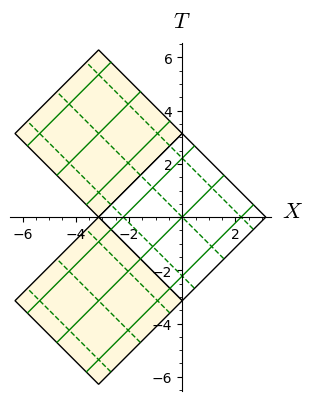

In [70]:
graph_PNG = Graphics()

for L in [inPNG(0, pi/3, 0), inPNG(-4, pi/3, 0), inPNG(4, pi/3, 0)]:
    L.expr(chart2=CC)
    graph_PNG += L.plot(CC, ambient_coords=(X, T), color='green', style='--', 
                        max_range=100, plot_points=4, parameters={m: 1})
    
for L in [outPNG(0, pi/3, 0), outPNG(-4, pi/3, 0), outPNG(4, pi/3, 0)]:
    L.expr(chart2=CCp)
    graph_PNG += L.plot(CCp, ambient_coords=(X, T), color='green', 
                        max_range=100, plot_points=4, parameters={m: 1})

for L in [outPNG_III(0, pi/3, 0), outPNG_III(-4, pi/3, 0), outPNG_III(4, pi/3, 0)]:
    L.expr(chart2=CC)
    graph_PNG += L.plot(CC, ambient_coords=(X, T), color='green', 
                        prange=(-100, 0.999), plot_points=4, parameters={m: 1})
    
for L in [inPNG_IIIp(0, pi/3, 0), inPNG_IIIp(-4, pi/3, 0), inPNG_IIIp(4, pi/3, 0)]:
    L.expr(chart2=CCp)
    graph_PNG += L.plot(CCp, ambient_coords=(X, T), color='green', style='--', 
                        prange=(-0.999, 100), plot_points=4, parameters={m: 1})
    
graph = graph0 + graph_PNG 
graph

### Plots of hypersurfaces of  constant $r$

In [71]:
def plot_const_r(r0, color='red', linestyle=':', thickness=1, plot_points=300):
    return KC.plot(CC, ambient_coords=(X,T), fixed_coords={th: pi/3, tph: 0, r: r0},
                   ranges={tt: (-100, 100)}, color=color, style=linestyle,
                   thickness=thickness, plot_points=plot_points, parameters={m: 1})

def plot_const_tt(tt0, color='darkgrey', linestyle='-', thickness=1, plot_points=100):
    resu = KC.plot(CC, ambient_coords=(X,T), fixed_coords={th: pi/3, tph: 0, tt: tt0},
                   ranges={r: (-100, -10)}, color=color, style=linestyle,
                   thickness=thickness, plot_points=plot_points, parameters={m: 1}) \
           + KC.plot(CC, ambient_coords=(X,T), fixed_coords={th: pi/3, tph: 0, tt: tt0},
                     ranges={r: (-10, 10)}, color=color, style=linestyle,
                     thickness=thickness, plot_points=plot_points, parameters={m: 1}) \
           + KC.plot(CC, ambient_coords=(X,T), fixed_coords={th: pi/3, tph: 0, tt: tt0},
                     ranges={r: (10, 100)}, color=color, style=linestyle,
                     thickness=thickness, plot_points=plot_points, parameters={m: 1})
    return resu

In [72]:
def plot_const_r_p(r0, color='red', linestyle=':', thickness=1, plot_points=300):
    return OKCp.plot(CCp, ambient_coords=(X,T), fixed_coords={th: pi/3, oph: 0, r: r0},
                     ranges={to: (-100, 100)}, color=color, style=linestyle,
                     thickness=thickness, plot_points=plot_points, parameters={m: 1})

def plot_const_to(to0, color='violet', linestyle='-', thickness=1, plot_points=100):
    resu = OKCp.plot(CCp, ambient_coords=(X,T), fixed_coords={th: pi/3, oph: 0, to: to0},
                     ranges={r: (-100, -10)}, color=color, style=linestyle,
                     thickness=thickness, plot_points=plot_points, parameters={m: 1}) \
           + OKCp.plot(CCp, ambient_coords=(X,T), fixed_coords={th: pi/3, oph: 0, to: to0},
                       ranges={r: (-10, 10)}, color=color, style=linestyle,
                       thickness=thickness, plot_points=plot_points, parameters={m: 1}) \
           + OKCp.plot(CCp, ambient_coords=(X,T), fixed_coords={th: pi/3, oph: 0, to: to0},
                       ranges={r: (10, 100)}, color=color, style=linestyle,
                       thickness=thickness, plot_points=plot_points, parameters={m: 1})
    return resu

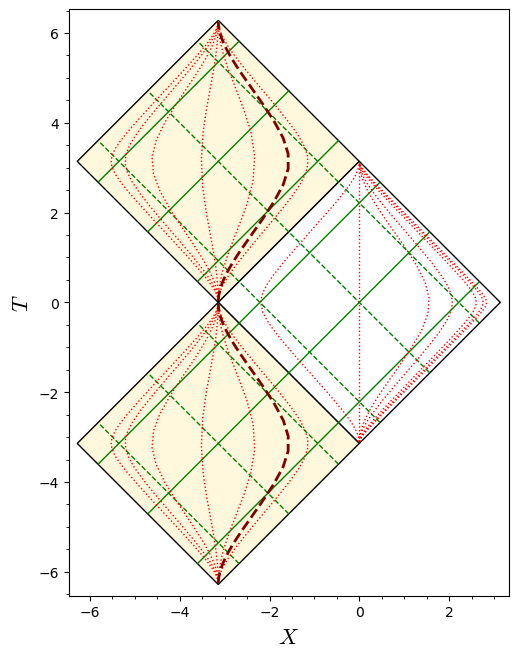

In [73]:
for r0 in [-10, -8, -6, -4, -2, 0.5, 1.5, 2, 2.5, 3, 5, 7, 9]:
    graph += plot_const_r(r0)
graph += plot_const_r(0, color='maroon', linestyle='--', thickness=2)

for r0 in [-10, -8, -6, -4, -2, 0.5]:
    graph += plot_const_r_p(r0)
graph += plot_const_r_p(0, color='maroon', linestyle='--', thickness=2)

show(graph, figsize=10, axes=False, frame=True)

### Plots of hypersurfaces of  constant $\tilde{t}$

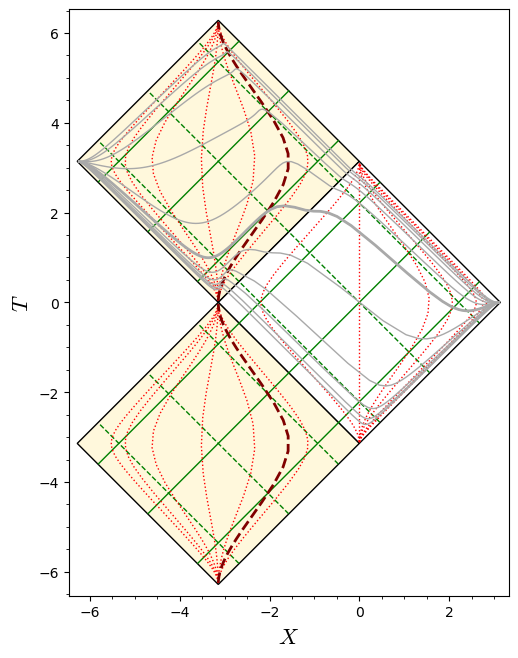

In [74]:
tmin, tmax, dt = -10, 10, 2
for i in range(int((tmax - tmin)/dt) + 1):
    ti = tmin + dt*i
    graph += plot_const_tt(ti) 
graph += plot_const_tt(0, thickness=2)
show(graph, figsize=10, axes=False, frame=True)

### Plots of hypersurfaces of  constant $\tilde{\tilde{t}}$

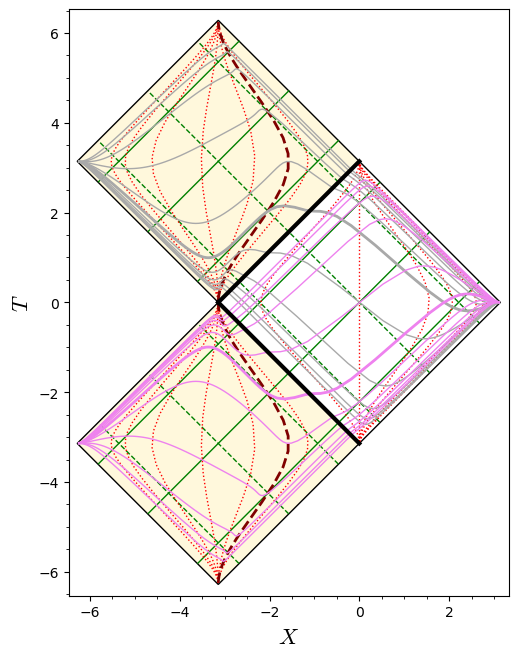

In [75]:
tmin, tmax, dt = -10, 10, 2
for i in range(int((tmax - tmin)/dt) + 1):
    ti = tmin + dt*i
    graph += plot_const_to(ti) 
graph += plot_const_to(0, thickness=2)

graph += line([(-pi,0), (0, pi)], color='black', thickness=3) \
         + line([(-pi,0), (0, -pi)], color='black', thickness=3)

show(graph, figsize=10, axes=False, frame=True)

In [76]:
graph.save('exk_CPdiag_M0-raw.svg', figsize=10, axes=False, frame=True)

## Maximal extension

In [77]:
Tc(tt, r) = KC_to_CC(tt, r, th, tph)[0].subs(m=1).simplify_full()
Xc(tt, r) = KC_to_CC(tt, r, th, tph)[1].subs(m=1).simplify_full()
show(Tc)
show(Xc)

(tt, r) |--> pi*unit_step(-r + 1) + arctan(1/2*r + 1/2*tt) - arctan(1/2*(r^2 - (r - 1)*tt + r*(4*log(abs(r - 1)) - 1) - 4*log(abs(r - 1)) - 4)/(r - 1))

(tt, r) |--> -pi*unit_step(-r + 1) + arctan(1/2*r + 1/2*tt) + arctan(1/2*(r^2 - (r - 1)*tt + r*(4*log(abs(r - 1)) - 1) - 4*log(abs(r - 1)) - 4)/(r - 1))

In [78]:
def plot_I(n):
    n2 = 2*n
    res = polygon([(pi, n2*pi), (0, (n2 + 1)*pi), (-pi, n2*pi), (0, (n2 - 1)*pi)], 
                  color='white', edgecolor='black')
    for r0 in [1.2, 1.4, 1.6, 1.8, 2, 4, 6, 8, 10]:
        res += parametric_plot((Xc(tt, r0), Tc(tt, r0) + n2*pi), (tt, -100, 100), color='red',
                               linestyle=':')
    res += line([(-pi, n2*pi), (0, (n2 + 1)*pi)], color='black', thickness=3)
    res += line([(-pi, n2*pi), (0, (n2 - 1)*pi)], color='black', thickness=3)
    res += line([(pi/2, -pi/2 + n2*pi), (-pi/2, pi/2 + n2*pi)], color='green', linestyle='--')
    res += line([(-pi/2, -pi/2 + n2*pi), (pi/2, pi/2 + n2*pi)], color='green')
    return res

def plot_III(n):
    n2 = 2*n
    res = polygon([(0, (n2 + 1)*pi), (-pi, (n2 + 2)*pi), (-2*pi, (n2 + 1)*pi), (-pi, n2*pi)], 
                  color='cornsilk', edgecolor='black')
    for r0 in [-10, -8, -6, -4, -2, 0.2, 0.4, 0.6, 0.8]:
        res += parametric_plot((Xc(tt, r0), Tc(tt, r0) + n2*pi), (tt, -100, 100), color='red',
                               linestyle=':')
    res += parametric_plot((Xc(tt, 0), Tc(tt, 0) + n2*pi), (tt, -100, 100), color='maroon', 
                           linestyle='--', thickness=2)
    res += line([(-pi/2, pi/2 + n2*pi), (-3*pi/2, 3*pi/2 + n2*pi)], color='green', linestyle='--')
    res += line([(-3*pi/2, pi/2 + n2*pi), (-pi/2, 3*pi/2 + n2*pi)], color='green')
    return res

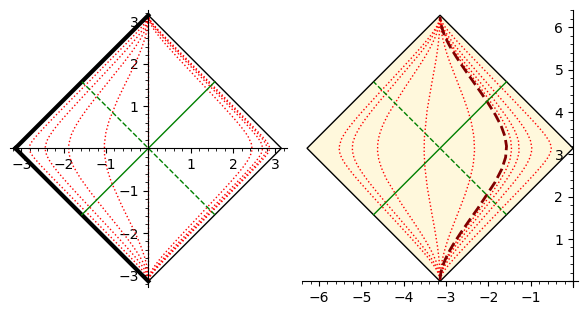

In [79]:
show(graphics_array([plot_I(0), plot_III(0)]), axes=True)

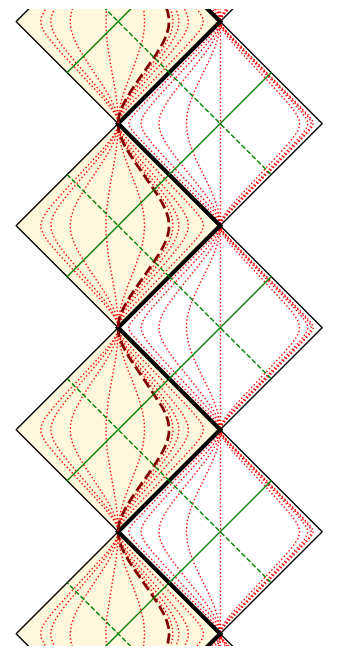

In [80]:
graph = Graphics()
for n in [-2..2]:
    graph += plot_I(n) + plot_III(n)
show(graph, figsize=10, axes=False, ymin=-3*pi, ymax=3*pi)